### Import module yang akan dipakai & menampilkan dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv (r'data jumlah penderita dbd jakarta pusat tahun 2018-2020(RAW_DATA).csv')
df.head() #Menampilkan 5 baris pertama dataset

,tahun,bulan,kota_administrasi,kecamatan,penderita_dbd
0,2018,1,Jakarta Pusat,Cempaka Putih,3
1,2018,2,Jakarta Pusat,Cempaka Putih,1
2,2018,3,Jakarta Pusat,Cempaka Putih,3
3,2018,4,Jakarta Pusat,Cempaka Putih,4
4,2018,5,Jakarta Pusat,Cempaka Putih,3


### Mengecek Keberadaan data kosong dan jumlahnya tiap kolom

In [2]:
df.isna().sum() # mendeteksi keberadaan nilai kosong

tahun                0
bulan                0
kota_administrasi    0
kecamatan            0
penderita_dbd        0
dtype: int64

### Mengindentifikasi ukuran datatset

In [3]:
df.shape # bentuk/dimensi dataset (baris,kolom)

(288, 5)

### Melihat daftar kolom

In [4]:
df.columns # daftar nama kolom

Index(['tahun', 'bulan', 'kota_administrasi', 'kecamatan', 'penderita_dbd'], dtype='object')

### Mengidentifikasi tipe data pada tiap kolom

In [5]:
df.dtypes # tipe data untuk tiap kolom

tahun                 int64
bulan                 int64
kota_administrasi    object
kecamatan            object
penderita_dbd         int64
dtype: object

### Mendeksripsikan dataset

In [6]:
df.describe() # deskripsi data

,tahun,bulan,penderita_dbd
count,288.000000,288.000000,288.000000
mean,2019.000000,6.500000,3.381944
std,0.817918,3.458061,5.479129
min,2018.000000,1.000000,0.000000
25%,2018.000000,3.750000,0.000000
50%,2019.000000,6.500000,1.000000
75%,2020.000000,9.250000,4.250000
max,2020.000000,12.000000,31.000000


### Melihat Korelasi Matrix

In [7]:
df.corr() # korelasi antar kolom

,tahun,bulan,penderita_dbd
tahun,1.000000e+00,1.476990e-14,0.195928
bulan,1.476990e-14,1.000000e+00,-0.499647
penderita_dbd,1.959284e-01,-4.996473e-01,1.000000


## Visualisasi Data 

### Import Modules

In [8]:
import matplotlib.pyplot as plt # visualisasi data
import seaborn as sns # visualisasi data

# output dari visualisasi data akan diarahkan ke notebook
%matplotlib inline 

### Pie Chart 

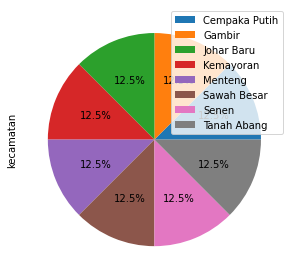

In [9]:
df['kecamatan'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()
plt.show()

### Heatmap

<AxesSubplot:>

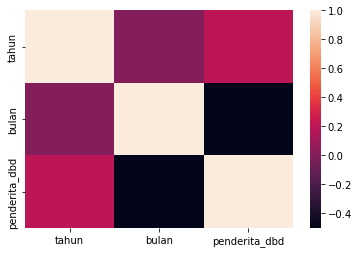

In [10]:
sns.heatmap(data=df.corr())

### Bar Plot

In [11]:
df['kecamatan'].value_counts() # menghitung jumlah setiap kategori

Cempaka Putih    36
Gambir           36
Johar Baru       36
Kemayoran        36
Menteng          36
Sawah Besar      36
Senen            36
Tanah Abang      36
Name: kecamatan, dtype: int64

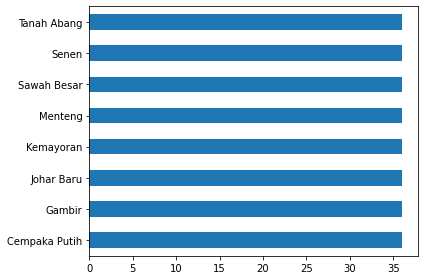

In [12]:
df['kecamatan'].value_counts().plot.barh()
plt.tight_layout()
plt.show()

### Scatter Plot

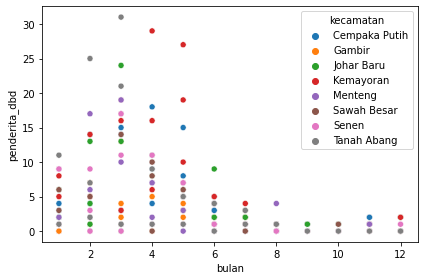

In [13]:
sns.scatterplot(x='bulan', y='penderita_dbd', data=df, hue='kecamatan')
plt.tight_layout()

### Pair Plot

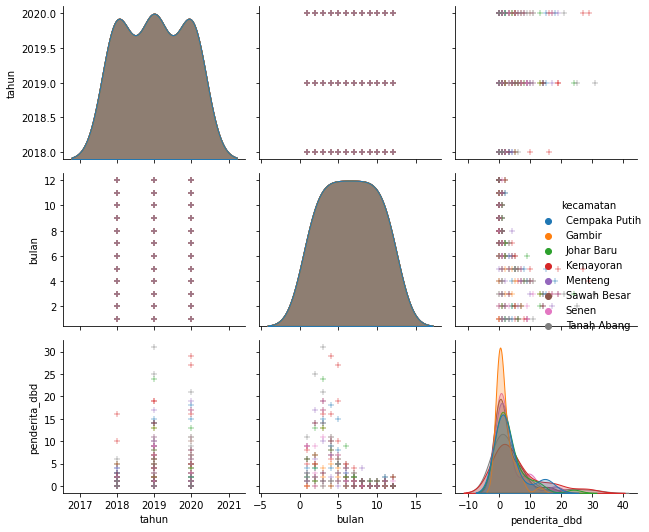

In [14]:
sns.pairplot(df, hue='kecamatan', markers='+')
plt.tight_layout()

## Menyiapkan dataset

#### Dataset: Features & Class Label

In [15]:
X = df.drop(columns=['kota_administrasi', 'kecamatan']) # menempatkan features ke dalam variable X
X.head() # tampilkan 5 baris pertama

,tahun,bulan,penderita_dbd
0,2018,1,3
1,2018,2,1
2,2018,3,3
3,2018,4,4
4,2018,5,3


In [16]:
y = df['kecamatan'] # menempatkan class label (target) ke dalam variabel y
y.head() # tampilkan 5 baris pertama

0    Cempaka Putih
1    Cempaka Putih
2    Cempaka Putih
3    Cempaka Putih
4    Cempaka Putih
Name: kecamatan, dtype: object

### Memisahkan dataset menjadi training set dan testing set 

#### Import Modules

In [17]:
from sklearn.model_selection import train_test_split # pembagi dataset menjadi training dan testing set

In [18]:
# membagi dataset ke dalam training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

training dataset
(201, 3)
(201,)

testing dataset:
(87, 3)
(87,)


## Model Klasifikasi 

#### Support Vector Classifier

In [19]:
# from sklearn.svm import SVC

# model_svc = SVC(gamma='scale')
# model_svc.fit(X_train,y_train)
# y_pred = model_svc.predict(X_test)

#### Decision Tree Classifier

In [20]:
# from sklearn.tree import DecisionTreeClassifier

# model_dt = DecisionTreeClassifier()
# model_dt.fit(X_train,y_train)
# y_pred = model_dt.predict(X_test)

## Model Classification

### K Nearest Neighbors

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3) # konfigurasi algoritma
model_knn.fit(X_train,y_train) # training model/classifier
y_pred = model_knn.predict(X_test) # melakukan prediksi

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter = 3000)
model_logreg.fit(X_train,y_train)
# y_pred = model_logreg.predict(X_test)

LogisticRegression(max_iter=3000)

### Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)
# y_pred = model_rf.predict(X_test)

RandomForestClassifier()

#### Perbandingan akurasi untuk berbagai model.

In [24]:
# models = [model_knn, model_logreg, model_rf]
# accuracy_scores = []
# for model in models:
#     y_pred = model.predict(X_test)
#     accuracy = metrics.rand_score(y_test, y_pred)
#     accuracy_scores.append(accuracy)
    
# print(accuracy_scores)

In [25]:
# accuracy = pd.DataFrame({'labels':['KNN', 'LogReg', 'SVC', 'DT', 'RF'], 'value':accuracy_scores})
# ax = accuracy.plot.barh(x='labels', y='value', legend=False)
# plt.title('Perbandingan akurasi untuk berbagai model', fontsize=15, color='r')
# plt.ylabel('Models', fontsize=18, color='g')
# plt.xlabel('Accuracy Score', fontsize=18, color='g')
# plt.tight_layout()
# plt.show()

## Model Clustering

In [26]:
from sklearn.preprocessing import MinMaxScaler # preprocessing dataset

In [27]:
mms = MinMaxScaler()
mms.fit(X_train)
Xnorm = mms.transform(X_train)
Xnorm.shape

(201, 3)

### K Means Clustering

#### Metode Elbow

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


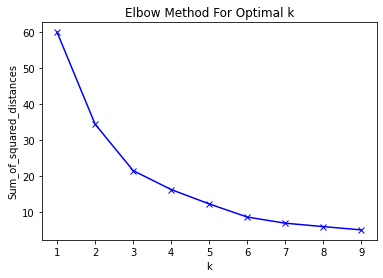

In [28]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
for k in range(1,10):
    km = KMeans(n_clusters=k, init='k-means++')
    km = km.fit(Xnorm)
    Sum_of_squared_distances.append(km.inertia_)
# Visualisasi hasil metode ke dalam grafik
plt.plot(range(1,10), Sum_of_squared_distances, 'bx-') 
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

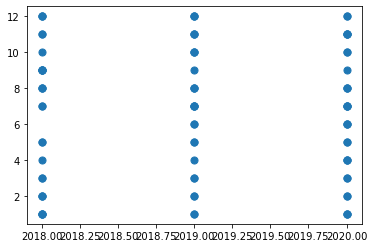

In [29]:
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], s=50);

In [30]:
model_kmeans = KMeans(n_clusters=3)
model_kmeans.fit(X_train,y_train)
y_pred = model_kmeans.predict(X_test)

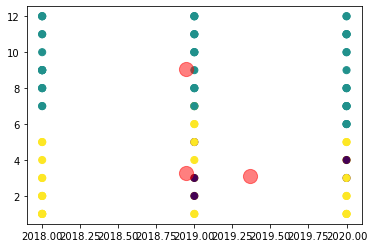

In [31]:
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

### Birch

In [32]:
from sklearn.cluster import Birch
model_birch = Birch(n_clusters = 3)
model_birch = model_birch.fit(X_train, y_train)
y_pred = model_birch.predict(X_test)

In [33]:
# metrics.rand_score(y_test, y_pred)

In [34]:
# metrics.fowlkes_mallows_score(y_test, y_pred) 

In [35]:
# metrics.rand_score(y_test, y_pred)

In [36]:
# metrics.fowlkes_mallows_score(y_test, y_pred) 

### Mengukur Tngkat akurasi model 

In [37]:
from sklearn import metrics # evaluasi performa model
models = [model_knn, model_logreg, model_rf, model_kmeans, model_birch]
accuracies = []
for model in models:
    y_pred = model.predict(X_test)
    accuracy = metrics.rand_score(y_test, y_pred)
    accuracies.append(accuracy)
print(accuracies)

[0.6952686447473937, 0.648757016840417, 0.7888265169740711, 0.5209836941994119, 0.4065757818765036]


### Dalam bentuk Grafik

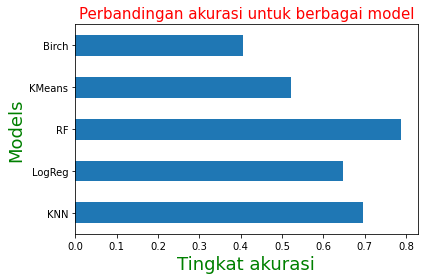

In [38]:
accuracy = pd.DataFrame({'labels':['KNN', 'LogReg','RF', 'KMeans', 'Birch'], 'value':accuracies})
ax = accuracy.plot.barh(x='labels', y='value', legend=False)
plt.title('Perbandingan akurasi untuk berbagai model', fontsize=15, color='r')
plt.ylabel('Models', fontsize=18, color='g')
plt.xlabel('Tingkat akurasi', fontsize=18, color='g')
plt.tight_layout()
plt.show()